In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from bs4 import BeautifulSoup
import urllib.request

## Import base game statistics

In [24]:
mlb_data = pd.read_pickle('./mlb_data.pkl')
mlb_data.head()

,home-away-indicator,opponent,win-loss-tie,runs,runs_allowed,innings,record,rank,gb,win,...,cLI,streak,year,home_team,day,month,num-date,multi-game,wins,losses
1,@,FLA,W,7,2,,1-0,2,0.5,Santana,...,1.05,1,2008,NYM,Monday,Mar,31,None,1,0
3,@,FLA,L-wo,4,5,10,1-1,2,1.0,Miller,...,1.16,-1,2008,NYM,Tuesday,Apr,1,None,1,1
4,@,FLA,W,13,0,,2-1,2,1.0,Perez,...,1.10,1,2008,NYM,Wednesday,Apr,2,None,2,1
5,@,ATL,L,5,11,,2-2,2,0.5,Hudson,...,1.11,-1,2008,NYM,Saturday,Apr,5,None,2,2
6,@,ATL,L,1,3,,2-3,3,0.5,Smoltz,...,1.11,-2,2008,NYM,Sunday,Apr,6,None,2,3


In [25]:
mlb_data.head()

,home-away-indicator,opponent,win-loss-tie,runs,runs_allowed,innings,record,rank,gb,win,...,cLI,streak,year,home_team,day,month,num-date,multi-game,wins,losses
1,@,FLA,W,7,2,,1-0,2,0.5,Santana,...,1.05,1,2008,NYM,Monday,Mar,31,None,1,0
3,@,FLA,L-wo,4,5,10,1-1,2,1.0,Miller,...,1.16,-1,2008,NYM,Tuesday,Apr,1,None,1,1
4,@,FLA,W,13,0,,2-1,2,1.0,Perez,...,1.10,1,2008,NYM,Wednesday,Apr,2,None,2,1
5,@,ATL,L,5,11,,2-2,2,0.5,Hudson,...,1.11,-1,2008,NYM,Saturday,Apr,5,None,2,2
6,@,ATL,L,1,3,,2-3,3,0.5,Smoltz,...,1.11,-2,2008,NYM,Sunday,Apr,6,None,2,3


### Enrich the base dataset by including information about the stadium capacities and the stadium type

In [26]:
stadium_stats = pd.read_csv('team_stadium_data.csv', encoding = "ISO-8859-1", engine='python')
stadium_stats.head()
stadium_stats.rename(columns={'Team Acronym':'home_team',
                              'Roof type': 'roof_type',
                              'Type': 'type'},inplace=True)
stadium_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   home_team                 30 non-null     object
 1   Name                      30 non-null     object
 2   Capacity                  30 non-null     object
 3   Location                  30 non-null     object
 4   Surface                   30 non-null     object
 5   Team                      30 non-null     object
 6   Opened                    30 non-null     object
 7   Distance to center field  30 non-null     object
 8   type                      30 non-null     object
 9   roof_type                 30 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB


### Remove odd characters in the capacity column as well as the commas

In [27]:
a = stadium_stats.Capacity.str.split("[")
cap = []
for stadium in a:
    seats = stadium[0]
    #print(seats)
    cap.append(seats)
print(cap)

stadium_stats.Capacity = cap
stadium_stats.Capacity = stadium_stats.Capacity.str.replace(",", "").str.strip()

['46,537', '41,649', '41,084', '25,000', '38,544', '47,929', '49286', '46,847', '34,830', '38,747', '40,209', '45,971', '41,265', '41,339', '41,168', '36742', '37,903', '40615', '42319', '40,300', '37,755', '56,000', '50,144', '41,083', '42,792', '41,922', '48,405', '45,494', '45,517', '41,900']


In [28]:
dist = stadium_stats['Distance to center field'].str.split(" ")
distance = []
for stadium in dist:
    seats = stadium[0]
    #print(seats)
    distance.append(seats)
print(distance)

stadium_stats['Distance to center field'] = distance
stadium_stats.rename(columns={'Distance to center field': 'dist_to_center_field_feet'}, inplace=True)

['408', '400', '400', '404', '404', '401', '400', '400', '410', '399', '396', '410', '391', '402', '409', '407', '410', '400', '404', '407', '390', '395', '415', '420', '401', '408', '407', '400', '396', '400']


In [29]:
stadium_stats.head()

,home_team,Name,Capacity,Location,Surface,Team,Opened,dist_to_center_field_feet,type,roof_type
0,NYY,Yankee Stadium,46537,"Bronx, New York",Grass,New York Yankees,2009,408,Retro-classic,Open
1,CHC,Wrigley Field,41649,"Chicago, Illinois",Grass,Chicago Cubs,1914[nb 6],400,Jewel box,Open
2,ATL,Truist Park,41084,"Cumberland, Georgia",Grass,Atlanta Braves,2017,400,Retro-modern,Open
3,TBR,Tropicana Field,25000,"St. Petersburg, Florida",Artificial turf,Tampa Bay Rays,1990[nb 5],404,Modern,Fixed
4,MIN,Target Field,38544,"Minneapolis, Minnesota",Grass,Minnesota Twins,2010,404,Retro-modern,Open


In [30]:
joined= pd.merge(mlb_data,stadium_stats, on='home_team',how='left')
joined.head()
joined.info()
print(joined.loc[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57663 entries, 0 to 57662
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   home-away-indicator        57663 non-null  object 
 1   opponent                   57663 non-null  object 
 2   win-loss-tie               57663 non-null  object 
 3   runs                       57663 non-null  object 
 4   runs_allowed               57663 non-null  object 
 5   innings                    57663 non-null  object 
 6   record                     57663 non-null  object 
 7   rank                       57663 non-null  object 
 8   gb                         57663 non-null  object 
 9   win                        57663 non-null  object 
 10  loss                       57663 non-null  object 
 11  save                       57663 non-null  object 
 12  time                       57663 non-null  object 
 13  day_night                  57663 non-null  obj

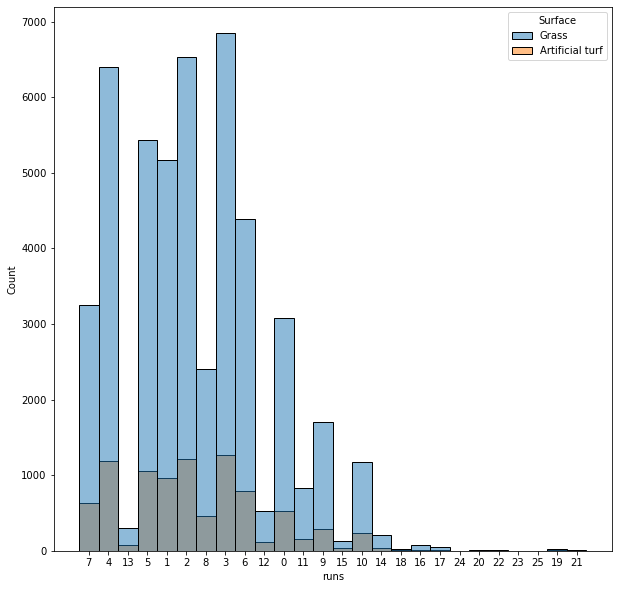

In [38]:
def seabornhist(size=(10,10), data=None, hue_c=None, x=None, title=None):
    fig, ax = plt.subplots(figsize=size)
    ax = sns.histplot(x=x, data= data, hue = hue_c, ax=ax)
    plt.title(title)
    plt.show()
    return

seabornhist(size=(10,10), data=joined, x='runs', hue_c = 'Surface')
plt.show()


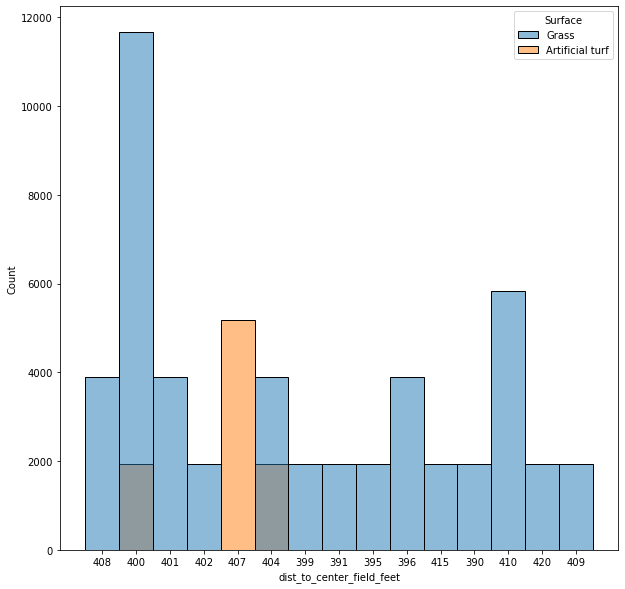

In [44]:
seabornhist(size=(10,10), data=joined, x='dist_to_center_field_feet', hue_c = 'Surface')
plt.show()

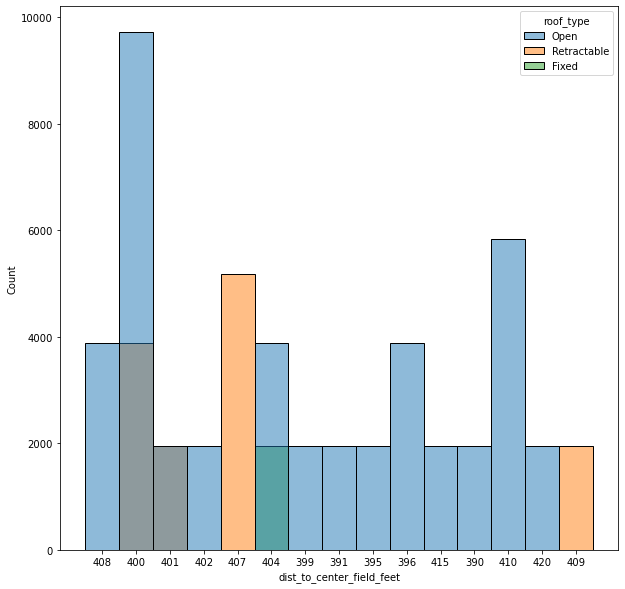

In [45]:
seabornhist(size=(10,10), data=joined, x='dist_to_center_field_feet', hue_c = 'roof_type')
plt.show()

<AxesSubplot:title={'center':'Overall live MLB Attendance Per Year'}, xlabel='runs', ylabel='Overall Attendance'>

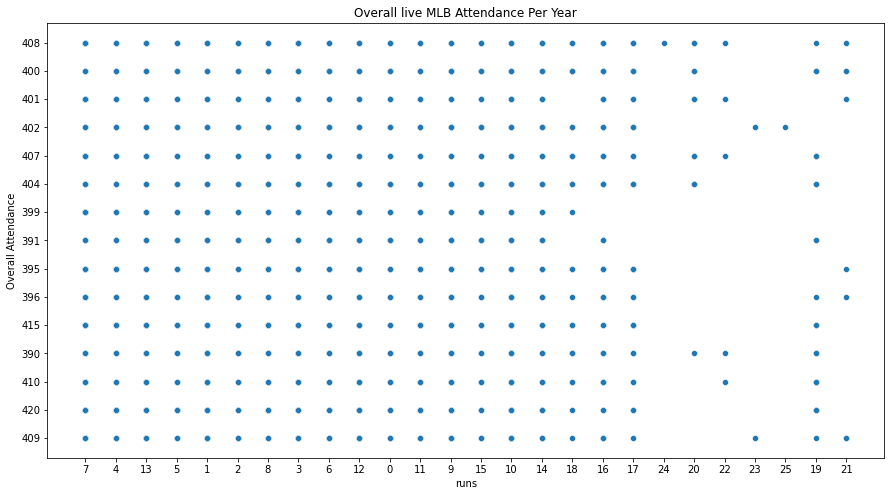

In [46]:
plt.figure(figsize=(15, 8))
plt.title('Overall live MLB Attendance Per Year')
plt.ylabel('Overall Attendance')
sns.scatterplot(x='runs', y='dist_to_center_field_feet', data=joined)

In [20]:
joined.dist_to_center_field_feet.unique()


array(['408', '400', '401', '402', '407', '404', '399', '391', '395',
       '396', '415', '390', '410', '420', '409'], dtype=object)

In [21]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57663 entries, 0 to 57662
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   home-away-indicator        57663 non-null  object 
 1   opponent                   57663 non-null  object 
 2   win-loss-tie               57663 non-null  object 
 3   runs                       57663 non-null  object 
 4   runs_allowed               57663 non-null  object 
 5   innings                    57663 non-null  object 
 6   record                     57663 non-null  object 
 7   rank                       57663 non-null  object 
 8   gb                         57663 non-null  object 
 9   win                        57663 non-null  object 
 10  loss                       57663 non-null  object 
 11  save                       57663 non-null  object 
 12  time                       57663 non-null  object 
 13  day_night                  57663 non-null  obj

In [22]:
joined.to_pickle(("./joined_data.pkl"))